## DSCI 531 Quiz 1

Time: 30 minutes

Introduction to visualization, marks, and channels, select and justify a data abstraction to use for a given task, and table data part

## Part 1 - Analyze plots

Provide an analysis of the following plots: 

#### 1(a)

![alt tag](img/1a.png)

1ai. State which mark type and which visual channels are being used to visually encode which attributes. 
<!-- rubric={quiz:1} -->

<span id="rubric">![rubric snippet](rubric_img/snip-1q.png)</span> <!-- end of rubric snippet -->

- Marks:
   - *area* marks encode the items representing *locales. *[give full
   credit for any synonym like* regions, geographic areas, world regions, *etc.
   this solution key avoids the term *region* for the items since it's
   ambiguous whether it means regions of the world or regions on the display!]
   - alternative answer of *line* mark is only given full credit if
      size/width/area is also mentioned as a channel below.
- Channels:
    - *vertical position (along a common scale)* encodes the quantitative
      attribute of *per-capita pollution*. [give full credit even if common
      scale not mentioned explicitly]
    - *1D size (width)* encodes quantitative attribute population. [do
      not give full credit for *horizontal* *position*, which implies
      absolute position along a common scale; it's size coded not position coded!]
    - *color (hue) *encodes categorical attribute *locale name *[give
      full credit for any combination of *color *and/or* hue*]
    - the horizontal axis is separated into regions that are aligned
      vertically and ordered horizontally by the *per-capita pollution* attribute
      [this answer not required for full credit. give spark mark if
      separate/order/align discussed correctly.]
    - **label/text* is acceptable [not required, but no credit lost if it is
      listed] *

##### 1aii. State if any attributes are redundantly coded with morethan one channel. 
<!-- rubric={quiz:1} -->

<span id="rubric">![rubric snippet](rubric_img/snip-1q.png)</span> <!-- end of rubric snippet -->

*No. [full credit if label/text identified as a channel and then claim is
redundant because have both color and text]*

##### 1aiii. Specify two abstract tasks for which this visual encoding would be effective.
<!-- rubric={quiz:1} -->

<span id="rubric">![rubric snippet](rubric_img/snip-1q.png)</span> <!-- end of rubric snippet -->


This visual encoding would be effective for:
- Comparing values among groups.
- Looking up values.

##### 1aiv. Describe the maximum scale for which a plot of this type would be effective (in terms of the number of items, the number of attributes, and the number of distinct levels for the attributes).
<!-- rubric={quiz:1} -->

<span id="rubric">![rubric snippet](rubric_img/snip-1q.png)</span> <!-- end of rubric snippet -->

This kind of plot could scale up to *one or two dozen items* [give full
credit for any answer from 10 to 50]. It encodes *three attributes*:
population, per-capita pollution, and region name [do not give full credit
for four attributes]. It scales to *hundreds of levels* for the quantiative
population and pollution attributes and *a dozen or so levels *for the
categorical locale name attributes. [Since this quiz does not cover the use
of color, the full credit given for arguing for more locale levels,
students are not expected to discuss the fact that the scalability of
categorical color coding is limited to a dozen or so levels.]

#### 1(b)

![alt tag](img/1b.png)
*Source: https://www.ncsu.edu/labwrite/res/gh/gh-linegraph.html*

##### 1bi. State which mark type and which visual channels are being used to visually encode which attributes. 
<!-- rubric={quiz:1} -->

<span id="rubric">![rubric snippet](rubric_img/snip-1q.png)</span> <!-- end of rubric snippet -->

- Mark type: points and lines.
- Visual channel: 
    - vertical position of the points encodes discharge.
    - horizontal position of the points encode month.
    - lines are used as connection marks between the points; alternately, line tilt encodes rate of discharge increase/decrease [full credit given for either answer]

##### 1bii. State if any attributes are redundantly coded with morethan one channel. 
<!-- rubric={quiz:1} -->

<span id="rubric">![rubric snippet](rubric_img/snip-1q.png)</span> <!-- end of rubric snippet -->

None of the attributes are redundantly coded with more than one channel.

##### 1biii. Specify two abstract tasks for which this visual encoding would be effective.
<!-- rubric={quiz:1} -->

<span id="rubric">![rubric snippet](rubric_img/snip-1q.png)</span> <!-- end of rubric snippet -->


This visual encoding would be effective for:
- Identifying outliers
- Identifying trends.

##### 1biv. Describe the maximum scale for which a plot of this type would be effective (in terms of the number of items, the number of attributes, and the number of distinct levels for the attributes).
<!-- rubric={quiz:1} -->

<span id="rubric">![rubric snippet](rubric_img/snip-1q.png)</span> <!-- end of rubric snippet -->

This plot would be effective for hundreds of key levels, hundreds of value levels.

## Part 2 - Redesign plots to address shortcomings

Review the plot below and answer the questions that follow:

In [1]:
# some set-up code to load libraries and data
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
chopstick = pd.read_csv("http://blog.yhat.com/static/misc/data/chopstick-effectiveness.csv")
chopstick.head()

Food.Pinching.Effeciency  Individual  Chopstick.Length
0                     19.55           1               180
1                     27.24           2               180
2                     28.76           3               180
3                     31.19           4               180
4                     21.91           5               180

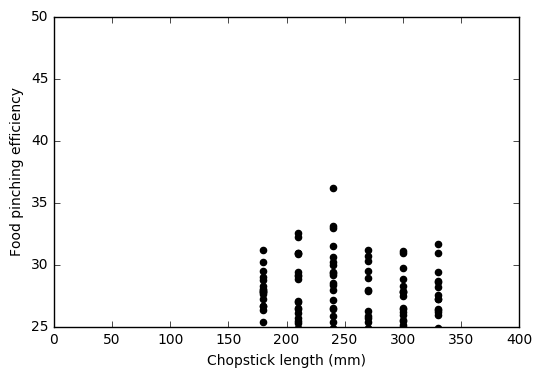

In [3]:
chop_scatter = chopstick.plot.scatter(x = 'Chopstick.Length', y='Food.Pinching.Effeciency', color = "black" )
plt.xlabel('Chopstick length (mm)')
plt.ylabel('Food pinching efficiency')
chop_scatter.set_ylim(25, 50)
chop_scatter.set_xlim(0, 400)
plt.show(chop_scatter)

##### 2a. identify at least one shortcoming of this plot and propose a solution in words that would make it more effective
<!-- rubric={quiz:2} -->

<span id="rubric">![rubric snippet](rubric_img/snip-2q.png)</span> <!-- end of rubric snippet -->

- Overplotting. 
    - Solution: add an alpha channel to be able to use luminance to see density.
- Chopstick length is categorical. 
    - Solution: use a boxplot instead.
- y-axis doesn't start at 0, may cut out some values. 
    - Solution: adjust y-axis. 

##### 2b. Re-implement the plot below, fixing the problem you identified
<!-- rubric={quiz:1} -->

<span id="rubric">![rubric snippet](rubric_img/snip-1q.png)</span> <!-- end of rubric snippet -->

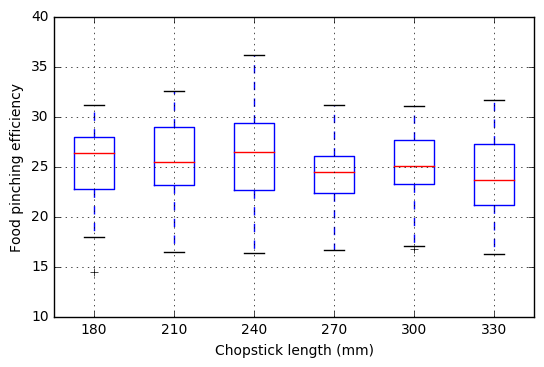

In [4]:
fig_q2 = chopstick.boxplot(column='Food.Pinching.Effeciency', by = 'Chopstick.Length')
plt.xlabel('Chopstick length (mm)')
plt.ylabel('Food pinching efficiency')
plt.title('')
plt.suptitle('')
plt.show(fig_q2)


## Part 3 - Critique channel usage

Review the plot below and answer the questions that follow:

In [5]:
mtcars = pd.read_csv("mtcars.csv")
mtcars.head()

mpg  cyl   disp     hp  drat     wt   qsec   vs   am  gear  carb
0  21.0  6.0  160.0  110.0  3.90  2.620  16.46  0.0  1.0   4.0   4.0
1  21.0  6.0  160.0  110.0  3.90  2.875  17.02  0.0  1.0   4.0   4.0
2  22.8  4.0  108.0   93.0  3.85  2.320  18.61  1.0  1.0   4.0   1.0
3  21.4  6.0  258.0  110.0  3.08  3.215  19.44  1.0  0.0   3.0   1.0
4  18.7  8.0  360.0  175.0  3.15  3.440  17.02  0.0  0.0   3.0   2.0

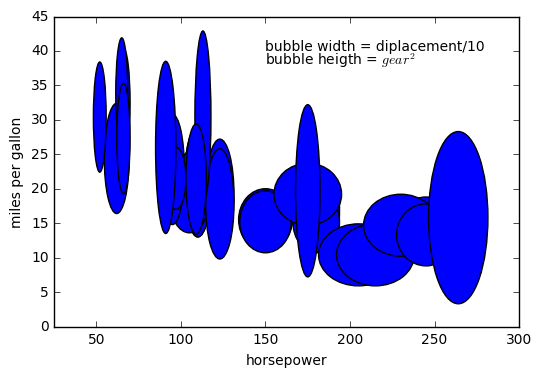

In [6]:
import matplotlib.patches as patches

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.set_xlim(25,300)
ax1.set_ylim(0,45)

for i in range(0,mtcars.shape[0]):
    ax1.add_patch(
        patches.Ellipse(
            (mtcars.hp.iloc[i], mtcars.mpg.iloc[i] ), # (x,y) position
            mtcars.disp.iloc[i]/10, # width
            mtcars.gear.iloc[i]**2, # height
        )
    )
  
plt.xlabel("horsepower")
plt.ylabel("miles per gallon")
ax1.annotate('bubble width = diplacement/10', xy=(150, 40),xytext=(150, 40))
ax1.annotate('bubble heigth = $gear^{2}$', xy=(150, 38),xytext=(150, 38))
plt.show(fig1)

##### 3a. In 2-3 sentences, critique this plot in terms of integral vs separable channels. 
<!-- rubric={quiz:2} -->

<span id="rubric">![rubric snippet](rubric_img/snip-2q.png)</span> <!-- end of rubric snippet -->

The horizontal size and vertical size channels are automatically fused into an integrated perception of area. What we directly perceive is the planar size of the circles, namely, their area.

##### 3b. Propose an alternate visual encoding that is more effective.
<!-- rubric={quiz:1} -->

<span id="rubric">![rubric snippet](rubric_img/snip-1q.png)</span> <!-- end of rubric snippet -->

Change the channels: Use color to encode gear, and use size to encode displacement.

##### 3c. Re-implement the plot below to make the visual encoding more effective (as you suggested in 3b).
<!-- rubric={quiz:2} -->

<span id="rubric">![rubric snippet](rubric_img/snip-2q.png)</span> <!-- end of rubric snippet -->

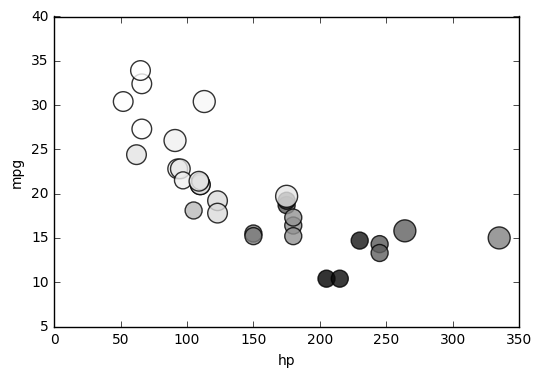

In [7]:
# A one-line solution, which is not perfect.
mtcars.plot.scatter("hp", "mpg", c = mtcars.disp, s = mtcars.gear*50, alpha = 0.8)

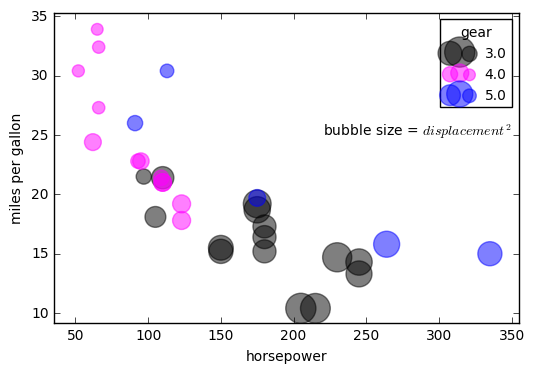

In [8]:
# A better solution

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
color = ['black', 'magenta', 'blue']
i = 0
for name, group in mtcars.groupby('gear'):
    ax.scatter(group.hp, group.mpg, s = group.disp, marker = 'o', 
               label = name, color = color[i], alpha = 0.5)
    i += 1
ax.legend(title = "gear", fontsize = 10)
ax.annotate('bubble size = $displacement^2$', xy=(250, 25), xytext=(220, 25))

plt.xlabel("horsepower")
plt.ylabel("miles per gallon")

plt.show(fig)

## Part 4 -Visual popout

Which of these visual encodings supports popout? Answer True or False for each:

##### 4a. position and color
<!-- rubric={quiz:1} -->

<span id="rubric">![rubric snippet](rubric_img/snip-1q.png)</span> <!-- end of rubric snippet -->

True

##### 4b. orientation and color
<!-- rubric={quiz:1} -->

<span id="rubric">![rubric snippet](rubric_img/snip-1q.png)</span> <!-- end of rubric snippet -->

False

##### 4c. width and height
<!-- rubric={quiz:1} -->

<span id="rubric">![rubric snippet](rubric_img/snip-1q.png)</span> <!-- end of rubric snippet -->

True

##### 4d. color and shape
<!-- rubric={quiz:1} -->

<span id="rubric">![rubric snippet](rubric_img/snip-1q.png)</span> <!-- end of rubric snippet -->

False

##### 4e. position and color
<!-- rubric={quiz:1} -->

<span id="rubric">![rubric snippet](rubric_img/snip-1q.png)</span> <!-- end of rubric snippet -->

True

##### 4f. parallelism
<!-- rubric={quiz:1} -->

<span id="rubric">![rubric snippet](rubric_img/snip-1q.png)</span> <!-- end of rubric snippet -->

False

##### 4g. color
<!-- rubric={quiz:1} -->

<span id="rubric">![rubric snippet](rubric_img/snip-1q.png)</span> <!-- end of rubric snippet -->

True

##### 4h. orientation
<!-- rubric={quiz:1} -->

<span id="rubric">![rubric snippet](rubric_img/snip-1q.png)</span> <!-- end of rubric snippet -->

True